In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import os

C:\Users\u5801283\Documents\Honours\honours_final\honours\thesis\figs


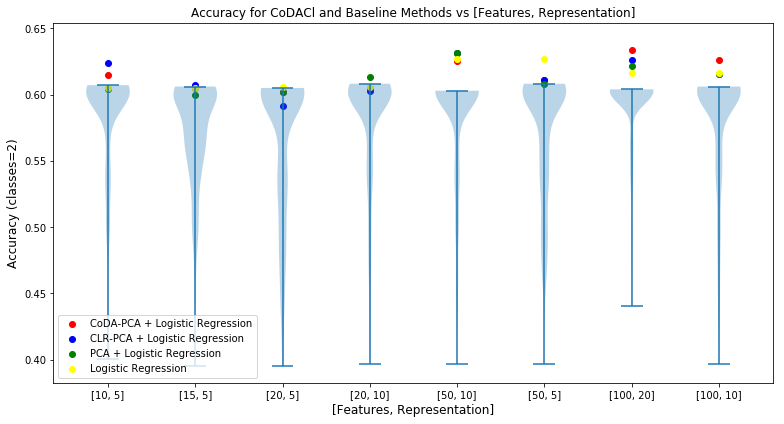

In [9]:
#find the path to store relative to current script
p = Path(os.getcwd()).parents[3]
PATH = os.path.join(os.path.join(p, "thesis"), "figs")
print (PATH)

df = pd.read_csv("atlas_test_gender.csv")

#params from experiment:

nn_dims = [[10,5, [[7,],[7,]]], [15,5, [[10,],[10,]]], [20,5, [[15,],[15,]]],[20,10, [[15,],[15,]]], [50,10, [[30,],[30,]]],[50,5, [[20,],[20,]]], [100,20, [[40,],[40,]]], [100,10, [[20,],[20,]]]]
lr_vals = [1e-3, 1e-4]
lam_vals = [0,1e-12,1e-11,1e-10,1e-8,1e-5,1e-2,1]
epoch_vals = [100, 200, 300, 400, 500, 1000]



#returns the mean scores for each parameter value, given a dataframe and the parameters
def get_dim_scores():
    #initialise x,y arrays for plotting
    x = []
    y = []
    baselines = []
    
    for i in range(0,len(nn_dims)):
        sub_df = pd.DataFrame(df[["num_features " + str(nn_dims[i][0]) + " " in x and "low_dimension " + str(nn_dims[i][1])  in x for x in df['Parameters']]])
        total_score = []
        
        for vals in sub_df['CoDACl Scores']:
            total_score.append(np.mean([float(i) for i in vals.strip('[').replace(',', '').strip(']').split(" ")]))

        #find the baselines: these are deterministic so we just need to take the first one
        coda_pca_score = np.mean([float(i) for i in sub_df['CoDAPCA Scores'].iloc[0].strip('[').replace(',', '').strip(']').split(" ")])
        clr_pca_score = np.mean([float(i) for i in sub_df['CLRPCA Scores'].iloc[0].strip('[').replace(',', '').strip(']').split(" ")])
        pca_score = np.mean([float(i) for i in sub_df['PCA Scores'].iloc[0].strip('[').replace(',', '').strip(']').split(" ")])
        naive_score = np.mean([float(i) for i in sub_df['Naive Scores'].iloc[0].strip('[').replace(',', '').strip(']').split(" ")])
            
        baselines.append([coda_pca_score, clr_pca_score, pca_score, naive_score])

        x.append([nn_dims[i][0], nn_dims[i][1]])
        y.append(total_score)
    return x, y, baselines

x, y, baselines = get_dim_scores()#get_param_scores_new('num_features', np.array(nn_dims)[:,0], df)

# Create a figure instance
fig = plt.figure(figsize = (10, 5))
# Create an axes instance
ax = fig.add_axes([0,0,1,1])


ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,0], color='red', label="CoDA-PCA + Logistic Regression")
ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,1], color='blue', label="CLR-PCA + Logistic Regression")
ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,2], color='green', label="PCA + Logistic Regression")
ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,3], color='yellow',label="Logistic Regression")


# Create the boxplot
bp = ax.violinplot(y)

ax.set_title('Accuracy for CoDACl and Baseline Methods vs [Features, Representation]', fontsize=12)

ax.set_xlabel('[Features, Representation]',fontsize='large')
ax.set_ylabel('Accuracy (classes=2)',fontsize='large')
ax.set_xticks(np.arange(1, len(x) + 1))
ax.set_xticklabels(x)

plt.legend()
plt.plot()
plt.savefig(os.path.join(PATH, "codacl_atlas_nfeatures_gender.svg"))





In [8]:
#returns the mean scores for each parameter value, given a dataframe and the parameters
def get_lam_scores():
    #initialise x,y arrays for plotting
    x = []
    y = []
    baselines = []
    for i in range(0,len(lam_vals)):
        sub_df = pd.DataFrame(df[["lam " + str(lam_vals[i]) in x for x in df['Parameters']]])
        total_score = []
        
        for vals in sub_df['CoDACl Scores']:
            total_score.append(np.mean([float(i) for i in vals.strip('[').replace(',', '').strip(']').split(" ")]))
            
        #find the baselines: take the average across all trials with fixed lambda (since they vary based on n_features/n_components)
        coda_pca_scores = []
        clr_pca_scores = []
        pca_scores = []
        naive_scores = []

        for j in range(0,len(sub_df)):
        
            coda_pca_scores.append(np.mean([float(i) for i in sub_df['CoDAPCA Scores'].iloc[j].strip('[').replace(',', '').strip(']').split(" ")]))
            clr_pca_scores.append(np.mean([float(i) for i in sub_df['CLRPCA Scores'].iloc[j].strip('[').replace(',', '').strip(']').split(" ")]))
            pca_scores.append(np.mean([float(i) for i in sub_df['PCA Scores'].iloc[j].strip('[').replace(',', '').strip(']').split(" ")]))
            naive_scores.append(np.mean([float(i) for i in sub_df['Naive Scores'].iloc[j].strip('[').replace(',', '').strip(']').split(" ")]))
            
        baselines.append([np.mean(coda_pca_scores), np.mean(clr_pca_scores), np.mean(pca_scores), np.mean(naive_scores)])

        x.append(lam_vals[i])
        y.append(total_score)
    return x, y, baselines


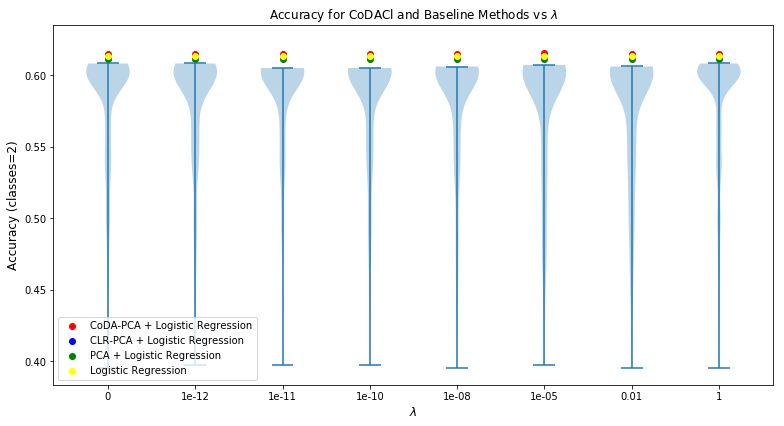

In [16]:
x,y,baselines = get_lam_scores()

# Create a figure instance
fig = plt.figure(figsize = (10, 5))
# Create an axes instance
ax = fig.add_axes([0,0,1,1])


ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,0], color='red', label="CoDA-PCA + Logistic Regression")
ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,1], color='blue', label="CLR-PCA + Logistic Regression")
ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,2], color='green', label="PCA + Logistic Regression")
ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,3], color='yellow',label="Logistic Regression")


# Create the boxplot
bp = ax.violinplot(y)

ax.set_title('Accuracy for CoDACl and Baseline Methods vs $\lambda$', fontsize=12)

ax.set_xlabel('$\lambda$',fontsize='large')
ax.set_ylabel('Accuracy (classes=2)',fontsize='large')
ax.set_xticks(np.arange(1, len(x) + 1))
ax.set_xticklabels(x)

plt.legend()
plt.plot()
plt.savefig(os.path.join(PATH, "codacl_atlas_lambda_gender.svg"))

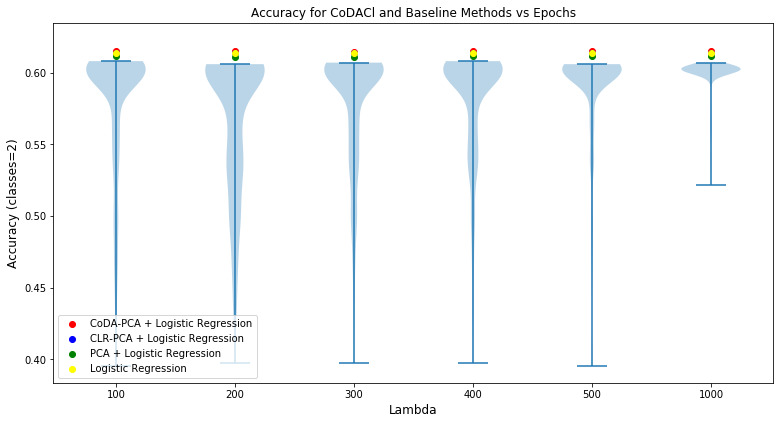

In [17]:
#returns the mean scores for each parameter value, given a dataframe and the parameters
def get_epoch_scores():
    #initialise x,y arrays for plotting
    x = []
    y = []
    baselines = []
    for i in range(0,len(epoch_vals)):
        sub_df = pd.DataFrame(df[["epochs " + str(epoch_vals[i]) in x for x in df['Parameters']]])
        total_score = []
        
        for vals in sub_df['CoDACl Scores']:
            total_score.append(np.mean([float(i) for i in vals.strip('[').replace(',', '').strip(']').split(" ")]))
            
            
       #find the baselines: take the average across all trials with fixed lambda (since they vary based on n_features/n_components)
        coda_pca_scores = []
        clr_pca_scores = []
        pca_scores = []
        naive_scores = []

        for j in range(0,len(sub_df)):
        
            coda_pca_scores.append(np.mean([float(i) for i in sub_df['CoDAPCA Scores'].iloc[j].strip('[').replace(',', '').strip(']').split(" ")]))
            clr_pca_scores.append(np.mean([float(i) for i in sub_df['CLRPCA Scores'].iloc[j].strip('[').replace(',', '').strip(']').split(" ")]))
            pca_scores.append(np.mean([float(i) for i in sub_df['PCA Scores'].iloc[j].strip('[').replace(',', '').strip(']').split(" ")]))
            naive_scores.append(np.mean([float(i) for i in sub_df['Naive Scores'].iloc[j].strip('[').replace(',', '').strip(']').split(" ")]))
            
        baselines.append([np.mean(coda_pca_scores), np.mean(clr_pca_scores), np.mean(pca_scores), np.mean(naive_scores)])


        x.append(epoch_vals[i])
        y.append(total_score)
    return x, y, baselines

x, y, baselines = get_epoch_scores()

# Create a figure instance
fig = plt.figure(figsize = (10, 5))
# Create an axes instance
ax = fig.add_axes([0,0,1,1])


ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,0], color='red', label="CoDA-PCA + Logistic Regression")
ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,1], color='blue', label="CLR-PCA + Logistic Regression")
ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,2], color='green', label="PCA + Logistic Regression")
ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,3], color='yellow',label="Logistic Regression")


# Create the boxplot
bp = ax.violinplot(y)

ax.set_title('Accuracy for CoDACl and Baseline Methods vs Epochs', fontsize=12)

ax.set_xlabel('Lambda',fontsize='large')
ax.set_ylabel('Accuracy (classes=2)',fontsize='large')
ax.set_xticks(np.arange(1, len(x) + 1))
ax.set_xticklabels(x)

plt.legend()
plt.plot()
plt.savefig(os.path.join(PATH, "codacl_atlas_epochs_gender.svg"))



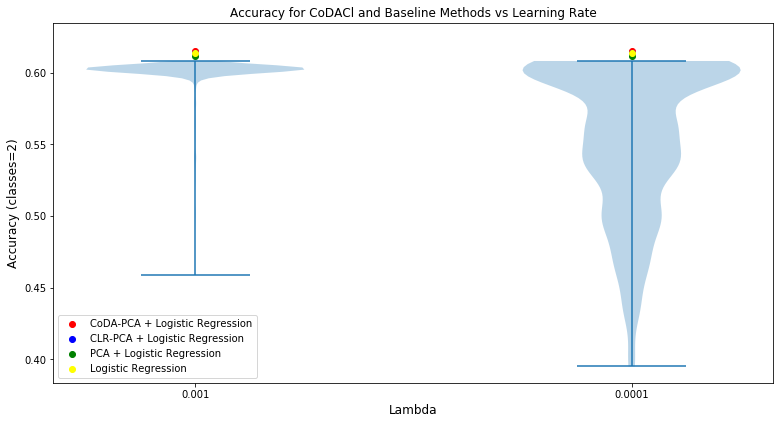

In [18]:
#returns the mean scores for each parameter value, given a dataframe and the parameters
def get_lr_scores():
    #initialise x,y arrays for plotting
    x = []
    y = []
    baselines = []
    for i in range(0,len(lr_vals)):
        sub_df = pd.DataFrame(df[["lr " + str(lr_vals[i]) in x for x in df['Parameters']]])
        total_score = []
        
        for vals in sub_df['CoDACl Scores']:
            total_score.append(np.mean([float(i) for i in vals.strip('[').replace(',', '').strip(']').split(" ")]))
            
            
       #find the baselines: take the average across all trials with fixed lambda (since they vary based on n_features/n_components)
        coda_pca_scores = []
        clr_pca_scores = []
        pca_scores = []
        naive_scores = []

        for j in range(0,len(sub_df)):
        
            coda_pca_scores.append(np.mean([float(i) for i in sub_df['CoDAPCA Scores'].iloc[j].strip('[').replace(',', '').strip(']').split(" ")]))
            clr_pca_scores.append(np.mean([float(i) for i in sub_df['CLRPCA Scores'].iloc[j].strip('[').replace(',', '').strip(']').split(" ")]))
            pca_scores.append(np.mean([float(i) for i in sub_df['PCA Scores'].iloc[j].strip('[').replace(',', '').strip(']').split(" ")]))
            naive_scores.append(np.mean([float(i) for i in sub_df['Naive Scores'].iloc[j].strip('[').replace(',', '').strip(']').split(" ")]))
            
        baselines.append([np.mean(coda_pca_scores), np.mean(clr_pca_scores), np.mean(pca_scores), np.mean(naive_scores)])


        x.append(lr_vals[i])
        y.append(total_score)
    return x, y, baselines

x, y, baselines = get_lr_scores()

# Create a figure instance
fig = plt.figure(figsize = (10, 5))
# Create an axes instance
ax = fig.add_axes([0,0,1,1])


ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,0], color='red', label="CoDA-PCA + Logistic Regression")
ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,1], color='blue', label="CLR-PCA + Logistic Regression")
ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,2], color='green', label="PCA + Logistic Regression")
ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,3], color='yellow',label="Logistic Regression")


# Create the boxplot
bp = ax.violinplot(y)

ax.set_title('Accuracy for CoDACl and Baseline Methods vs Learning Rate', fontsize=12)

ax.set_xlabel('Lambda',fontsize='large')
ax.set_ylabel('Accuracy (classes=2)',fontsize='large')
ax.set_xticks(np.arange(1, len(x) + 1))
ax.set_xticklabels(x)

plt.legend()
plt.plot()
plt.savefig(os.path.join(PATH, "codacl_atlas_lr_gender.svg"))
